<a href="https://colab.research.google.com/github/Preteka/Deep-Learning-Lab/blob/main/dl8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


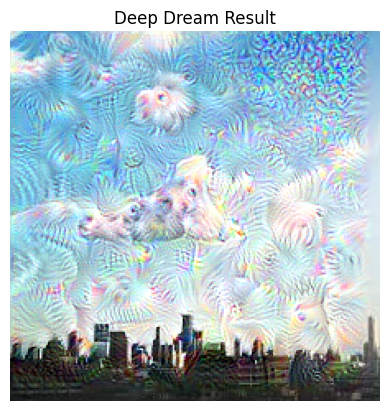

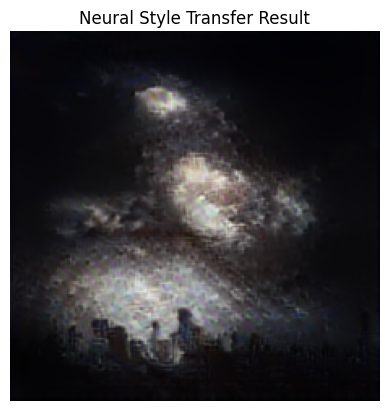

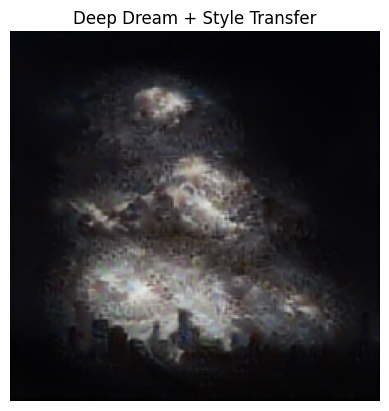

In [1]:
# ===============================================
# Deep Dream + Neural Style Transfer in One Code
# ===============================================

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow_hub as hub

# ---------------------------
# Utility Functions
# ---------------------------
def load_image(path, max_dim=512):
    img = Image.open(path)
    img = img.convert("RGB")
    img.thumbnail((max_dim, max_dim))
    img = np.array(img) / 255.0
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    return img[tf.newaxis, :]

def show_image(img, title=""):
    if len(img.shape) == 4:
        img = img[0]
    plt.imshow(np.clip(img, 0, 1))
    plt.axis("off")
    plt.title(title)
    plt.show()

# ---------------------------
# Deep Dream Implementation
# ---------------------------
def deepdream(image, model, steps=100, step_size=0.01):
    image = tf.convert_to_tensor(image)
    for step in range(steps):
        with tf.GradientTape() as tape:
            tape.watch(image)
            loss = tf.reduce_mean(model(image))
        grads = tape.gradient(loss, image)
        grads = grads / (tf.math.reduce_std(grads) + 1e-8)
        image = image + grads * step_size
        image = tf.clip_by_value(image, 0.0, 1.0)
    return image

# Load InceptionV3 for Deep Dream
base_model = tf.keras.applications.InceptionV3(include_top=False, weights="imagenet")
dream_layers = ['mixed3', 'mixed5']
dream_model = tf.keras.Model(
    inputs=base_model.input,
    outputs=[base_model.get_layer(name).output for name in dream_layers]
)

# ---------------------------
# Neural Style Transfer
# ---------------------------
style_transfer_model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

def neural_style_transfer(content_img, style_img):
    stylized_image = style_transfer_model(tf.constant(content_img), tf.constant(style_img))[0]
    return stylized_image

# ---------------------------
# Run Experiment
# ---------------------------
# 📌 Replace with your image paths
content_path = "content.jpeg"  # Your content image
style_path = "stly.jpeg"      # Your style image

# Load images
content_image = load_image(content_path)
style_image = load_image(style_path, max_dim=256)

# 1️⃣ Apply Deep Dream
dreamed_image = deepdream(content_image, dream_model, steps=50, step_size=0.01)
show_image(dreamed_image, "Deep Dream Result")

# 2️⃣ Apply Neural Style Transfer
stylized_image = neural_style_transfer(content_image, style_image)
show_image(stylized_image, "Neural Style Transfer Result")

# 3️⃣ Combine Deep Dream + Style Transfer
combined = neural_style_transfer(dreamed_image, style_image)
show_image(combined, "Deep Dream + Style Transfer")
